In [2]:
import numpy as np
from scipy.linalg import svd
import matplotlib.pyplot as plt
from scipy.stats import ortho_group
from scipy.sparse import csc_matrix, diags
from scipy.sparse.linalg import svds

We will demonstrate the result of Th.1. on Marchenko-Pastur distribution

In [3]:
n=10000       #Number of observations
y1=0.6
p=int(n*y1)   #Number of assets

In [4]:
Z = np.random.randn(n,p)

In [5]:
W = (Z.transpose() @ Z) / n   #A sample correlation matrix for independent assets

In [6]:
eigenvalues=np.linalg.eigvals(W)

(array([200., 236., 223., 211., 194., 183., 171., 162., 157., 148., 139.,
        134., 129., 124., 121., 118., 111., 109., 103., 100., 100.,  95.,
         94.,  91.,  87.,  86.,  83.,  81.,  80.,  76.,  74.,  75.,  70.,
         70.,  69.,  66.,  65.,  65.,  63.,  59.,  59.,  57.,  57.,  55.,
         54.,  51.,  51.,  49.,  49.,  47.,  47.,  44.,  42.,  45.,  41.,
         39.,  39.,  39.,  37.,  34.,  36.,  32.,  31.,  31.,  30.,  29.,
         28.,  25.,  25.,  23.,  23.,  20.,  20.,  19.,  16.,  15.,  13.,
         11.,  11.,   4.]),
 array([0.05131648, 0.08995414, 0.1285918 , 0.16722945, 0.20586711,
        0.24450477, 0.28314243, 0.32178008, 0.36041774, 0.3990554 ,
        0.43769306, 0.47633071, 0.51496837, 0.55360603, 0.59224369,
        0.63088134, 0.669519  , 0.70815666, 0.74679432, 0.78543197,
        0.82406963, 0.86270729, 0.90134495, 0.9399826 , 0.97862026,
        1.01725792, 1.05589558, 1.09453323, 1.13317089, 1.17180855,
        1.21044621, 1.24908386, 1.28772152, 1.

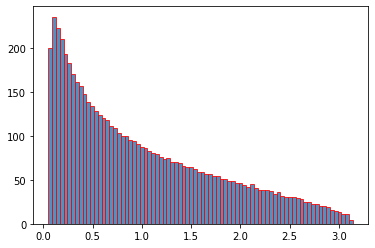

In [7]:
plt.hist(eigenvalues, 80, alpha=.8, edgecolor='red')

Now we plot eigenvalues for the case of one group of constantly correlated assets and demonstrate that these distributions coincide after multiplication by (1-correlation)

In [8]:
rho1 = 0.9
E= np.ones((p, p))
b= (-np.sqrt(1 - rho1) - np.sqrt(1 + rho1 * (p-1))) / p
C= np.sqrt(1 - rho1) * np.identity(p) + E * b            #Matrix C is a block-type sqrt(Sigma_rho)
print(C @ C)

[[1.  0.9 0.9 ... 0.9 0.9 0.9]
 [0.9 1.  0.9 ... 0.9 0.9 0.9]
 [0.9 0.9 1.  ... 0.9 0.9 0.9]
 ...
 [0.9 0.9 0.9 ... 1.  0.9 0.9]
 [0.9 0.9 0.9 ... 0.9 1.  0.9]
 [0.9 0.9 0.9 ... 0.9 0.9 1. ]]


In [9]:
Wrho=C.transpose() @ W @ C        #Correlation matrix

In [10]:
eigenvalues_rho = np.linalg.eigvals(Wrho)

(array([200., 236., 223., 210., 195., 182., 172., 162., 156., 148., 140.,
        134., 128., 125., 121., 117., 111., 109., 103., 101.,  99.,  95.,
         94.,  91.,  88.,  86.,  82.,  82.,  79.,  76.,  75.,  74.,  70.,
         70.,  70.,  65.,  65.,  65.,  63.,  59.,  58.,  59.,  56.,  54.,
         55.,  51.,  51.,  49.,  49.,  48.,  46.,  43.,  43.,  45.,  40.,
         41.,  38.,  39.,  37.,  34.,  36.,  32.,  31.,  32.,  29.,  29.,
         27.,  26.,  25.,  24.,  22.,  21.,  20.,  18.,  16.,  15.,  13.,
         11.,  11.,   4.]),
 array([0.00513167, 0.00899491, 0.01285816, 0.0167214 , 0.02058465,
        0.0244479 , 0.02831114, 0.03217439, 0.03603763, 0.03990088,
        0.04376413, 0.04762737, 0.05149062, 0.05535386, 0.05921711,
        0.06308036, 0.0669436 , 0.07080685, 0.07467009, 0.07853334,
        0.08239659, 0.08625983, 0.09012308, 0.09398632, 0.09784957,
        0.10171282, 0.10557606, 0.10943931, 0.11330255, 0.1171658 ,
        0.12102905, 0.12489229, 0.12875554, 0.

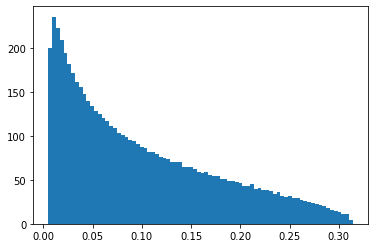

In [11]:
plt.hist(eigenvalues_rho[1:], 80)

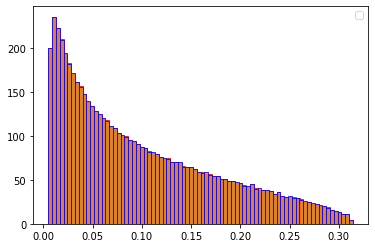

In [12]:
plt.hist( (1-rho1) * eigenvalues, 80, alpha=.8, edgecolor='red')
plt.hist(eigenvalues_rho[1:], 80, alpha=.8, edgecolor='blue')
plt.legend()
 
# Showing the plot using plt.show()
plt.show()

We see that the highest eigenvalue has asymptotic $y*rho*n$

---



In [13]:
u2, s2, vT2 = svds(Z @ C / np.sqrt(n), k=1)
print('Check first eigenvalues asumptotic:',  eigenvalues_rho[0] / n, s2[0]**2 / n)

Check first eigenvalues asumptotic: 0.5455710355439249 0.5455710355439248


Now we suppose that there are 2 blocks: 30% corresponds to $\rho=0.7$ and 70% corresponds to $\rho=0$
(We will demonstrate results of Th.2 now)

In [14]:
block_coeff = 0.7
n1 = int(block_coeff * p) # Number of assets in the first block
y1 = n1 / n
E_block = np.ones((n1, n1))
b_block = (-np.sqrt(1 - rho1) - np.sqrt(1 + rho1 * (n1-1))) / n1
C_block = np.sqrt(1 - rho1) * np.identity(n1) + E_block * b_block
print(C_block @ C_block)



[[1.  0.9 0.9 ... 0.9 0.9 0.9]
 [0.9 1.  0.9 ... 0.9 0.9 0.9]
 [0.9 0.9 1.  ... 0.9 0.9 0.9]
 ...
 [0.9 0.9 0.9 ... 1.  0.9 0.9]
 [0.9 0.9 0.9 ... 0.9 1.  0.9]
 [0.9 0.9 0.9 ... 0.9 0.9 1. ]]


In [15]:
rho2 = 0.7
n2 = p - n1    #number of assets in the second block
E2_block = np.ones((n2, n2))
b2_block = (-np.sqrt(1 - rho2) - np.sqrt(1 + rho2*(n2 - 1))) / n2
C2_block = np.sqrt(1 - rho2) * np.identity(n2) + E2_block * b2_block

B=np.identity(p)              
for i in range(n1):
  for j in range(n1):
    B[i][j] = C_block[i][j]
for i in range(n2):
  for j in range(n2):
    B[i + n1][j + n1] = C2_block[i][j]
print(B @ B) # Check that B = SquareRoot(Sigma)


[[1.  0.9 0.9 ... 0.  0.  0. ]
 [0.9 1.  0.9 ... 0.  0.  0. ]
 [0.9 0.9 1.  ... 0.  0.  0. ]
 ...
 [0.  0.  0.  ... 1.  0.7 0.7]
 [0.  0.  0.  ... 0.7 1.  0.7]
 [0.  0.  0.  ... 0.7 0.7 1. ]]


In [16]:
E1 = np.zeros((n,1))
E2 = np.zeros((n,1))
for i in range(n1):
  E1[i] =1
for i in range(n2):
  E2[n1 + i] = 1
BM =  E1 @ E1.transpose()   
print(BM)

[[1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Construct matrix $X_2$ that contains squared variables

In [17]:
X = Z @ B
X2 = X * X - 1


In [18]:
ub, lambda1, vb = svds(X / np.sqrt(n), k=2)
ub2, lambda2, vb2 = svds(X2 / np.sqrt(n), k=2)

In [19]:
rho_estim0 = lambda2[0]**2 / lambda1[0]**2 / 2
rho_estim1 = lambda2[1]**2 / lambda1[1]**2 / 2
print('Estimated values of rho', rho_estim0, rho_estim1)
print('true values of rho', rho1, rho2)

Estimated values of rho 0.7112046132658666 0.9225873459876154
true values of rho 0.9 0.7


In [20]:
print('Estimated value of the block size', lambda1[0]**2 / rho_estim0, lambda1[1]**2 / rho_estim1)

Estimated value of the block size 1762.2132496145566 4067.30554426782


In [21]:
print('original block sizes', n1, n2)

original block sizes 4200 1800


Case of nonttrivial Interblock interaction

In [22]:
gamma=0.35


In [23]:
B2 = B @ B
for i in range(n1):
  for j in range(n2):
    B2[i][j+n1] = gamma
    B2[j+n1][i] = gamma

B = np.linalg.cholesky(B2)
print(B @ B.transpose())

[[1.   0.9  0.9  ... 0.35 0.35 0.35]
 [0.9  1.   0.9  ... 0.35 0.35 0.35]
 [0.9  0.9  1.   ... 0.35 0.35 0.35]
 ...
 [0.35 0.35 0.35 ... 1.   0.7  0.7 ]
 [0.35 0.35 0.35 ... 0.7  1.   0.7 ]
 [0.35 0.35 0.35 ... 0.7  0.7  1.  ]]


Plot graph (method W3):

In [ ]:
list_rhos11 = []
list_rhos22 = []
list_rhos12 = []
list_y1 = []
list_y2 = []
plot_size = 100
for i in range (plot_size):
  Z = np.random.randn(n,p)
  X = Z @ B.transpose()
  X3 = X * X * X - 3 * X 
  u3, s3, v3 = svds(X3 / np.sqrt(n), k=2)
  rho1y1=(X @ v3[1]).transpose() @ (X @ v3[1])/n/n
  rho2y2=(X @ v3[0]).transpose() @ (X @ v3[0])/n/n
  rho12sqrty1sqrty2=(X @ v3[1]).transpose() @ (X @ v3[0])/n/n
  rho1_estimated=(s3[1]**2 / n / rho1y1 / 6)**0.5
  rho2_estimated=(s3[0]**2 / n / rho2y2 / 6)**0.5
  y1_estimated= rho1y1 / rho1_estimated
  y2_estimated= rho2y2 / rho2_estimated
  rho12_estimated = rho12sqrty1sqrty2 / np.sqrt(y1_estimated * y2_estimated)
  list_rhos11.append(rho1_estimated)
  list_rhos22.append(rho2_estimated)
  list_rhos12.append(rho12_estimated)
  list_y1.append(y1_estimated)
  list_y2.append(y2_estimated)
  print(rho1_estimated,rho2_estimated, rho12_estimated, y1_estimated, y2_estimated)


0.8965883473922618 0.7029050937972274 0.3096971307250086 0.43077073371687064 0.16016013288989275
0.877948950937223 0.733577585296137 -0.306997497908684 0.4529287475936682 0.15517653320441838


In [25]:
yy=np.ones(plot_size)
print('mean (measured vs theor)',np.mean(list_rhos11), rho1)
print('std',np.std(list_rhos11))
print('mean (measured vs theor)',np.mean(list_rhos22), rho2)
print('std',np.std(list_rhos22))
print('mean (measured vs theor)',np.mean(np.abs(list_rhos12)), gamma)
print('std',np.std(np.abs(list_rhos12)))
print('mean (measured vs theor)',np.mean(list_y1), y1)
print('std',np.std(list_y1))
print('mean (measured vs theor)',np.mean(list_y2), n2/n)
print('std',np.std(list_y2))

mean (measured vs theor) 0.8956144274822061 0.9
std 0.04010414001406229
mean (measured vs theor) 0.7230035777194975 0.7
std 0.03418142934177644
mean (measured vs theor) 0.31737834493103434 0.35
std 0.014423291182005167
mean (measured vs theor) 0.4306419412388134 0.42
std 0.018651760871337273
mean (measured vs theor) 0.1622395899818067 0.18
std 0.00901669857571519


Plot graph (method W4):

In [26]:
list4_rhos11 = []
list4_rhos22 = []
list4_rhos12 = []
list4_y1 = []
list4_y2 = []
plot_size4 = 100
for i in range (plot_size4):
  Z = np.random.randn(n,p)
  X = Z @ B.transpose()
  alpha4=-6
  X4 = X * X * X * X + alpha4 * X * X - (3+alpha4) 
  u4, s4, v4 = svds(X4 / np.sqrt(n), k=2)

  qrho1y1=(X @ v4[1]).transpose() @ (X @ v4[1])/n/n
  qrho2y2=(X @ v4[0]).transpose() @ (X @ v4[0])/n/n
  
  qrho12sqrty1sqrty2=(X @ v4[1]).transpose() @ (X @ v4[0])/n/n
  qrho1_estimated = (s4[1]**2/ n /qrho1y1 / 24)**(1./3)
  qrho2_estimated = (s4[0]**2/ n /qrho2y2 / 24)**(1./3)
  
  qy1_estimated= qrho1y1 / qrho1_estimated
  qy2_estimated= qrho2y2 / qrho2_estimated
  qrho12_estimated = qrho12sqrty1sqrty2 / np.sqrt(qy1_estimated * qy2_estimated)
  
  list4_rhos11.append(qrho1_estimated)
  list4_rhos22.append(qrho2_estimated)
  list4_rhos12.append(qrho12_estimated)
  list4_y1.append(qy1_estimated)
  list4_y2.append(qy2_estimated)
  print(qrho1_estimated,qrho2_estimated, qrho12_estimated, qy1_estimated, qy2_estimated)

1.009322610652603 0.7091176213443471 0.3719329010336329 0.37296460635472223 0.17242770187006387
0.7879592960686774 0.8317390500250851 -0.3442892267715416 0.4830953176055037 0.14104076315901048
0.8912732216846004 0.8090750675908478 0.3035890851683785 0.4374872158489344 0.13613479871330655
0.8301907523892242 0.6716919934092611 0.29586401887294017 0.4604228519934055 0.17245457437534334
0.8161360821832597 0.6912012621155229 -0.3353433923876239 0.4601532210498563 0.17843034829613588
0.8865005197232482 0.7308760367375464 -0.34692728765928016 0.4228605576833646 0.16594475066223474
0.9489130389493802 0.6485762940756832 -0.34217584742690976 0.4014667813007533 0.19005493537528353
0.9057724707126263 0.7319933325011736 -0.3154877247390281 0.42430898595086514 0.157445035501393
0.911744011177192 0.726989094317098 -0.30053801982989664 0.4213993790234242 0.15315532917983873
0.8048717466765224 0.7649457341325318 0.32064804736154773 0.47233171686340225 0.15298319518304052
0.8404061597201935 0.7430761102

In [27]:
print('mean (measured vs theor)',np.mean(list4_rhos11), rho1)
print('std',np.std(list4_rhos11))
print('mean (measured vs theor)',np.mean(list4_rhos22), rho2)
print('std',np.std(list4_rhos22))
print('mean (measured vs theor)',np.mean(np.abs(list4_rhos12)), gamma)
print('std',np.std(np.abs(list4_rhos12)))
print('mean (measured vs theor)',np.mean(list4_y1), y1)
print('std',np.std(list4_y1))
print('mean (measured vs theor)',np.mean(list4_y2), n2/n)
print('std',np.std(list4_y2))

mean (measured vs theor) 0.8953258923505923 0.9
std 0.06660497140746684
mean (measured vs theor) 0.7259547135786252 0.7
std 0.057254587329420535
mean (measured vs theor) 0.3391119574614087 0.35
std 0.024346520467535646
mean (measured vs theor) 0.4243727445847522 0.42
std 0.03207383695822456
mean (measured vs theor) 0.16417458275235913 0.18
std 0.016016665781981503
